<a href="https://colab.research.google.com/github/ImenJaoua/parking-space-counter/blob/main/parking_yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone http://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt
%pip install -q roboflow

import torch 
import os
from IPython.display import Image, clear_output 

Cloning into 'yolov5'...
remote: Enumerating objects: 14654, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 14654 (delta 0), reused 0 (delta 0), pack-reused 14650
Receiving objects: 100% (14654/14654), 13.79 MiB | 37.46 MiB/s, done.
Resolving deltas: 100% (10078/10078), done.
/content/yolov5
     |████████████████████████████████| 182 kB 26.8 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 1.6 MB 62.4 MB/s 
     |████████████████████████████████| 42 kB 777 kB/s 
     |████████████████████████████████| 138 kB 79.4 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 145 kB 81.9 MB/s 
     |████████████████████████████████| 178 kB 90.1 MB/s 
     |████████████████████████████████| 67 kB 6.3 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 


In [2]:
from roboflow import Roboflow 
rf= Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [3]:
os.environ["DATASET_DIRECTORY"]= "/content/datasets"

In [4]:
rf = Roboflow(api_key="p1AvSEjh2PY3S40SvHWr")
project = rf.workspace("school-dsext").project("parking-mmvg9")
dataset = project.version(4).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/parking-4 in yolov5pytorch:: 100%|██████████| 61/61 [00:00<00:00, 5831.53it/s]


In [5]:
!python train.py --img 416 --batch 4 --epochs 30 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/parking-4/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=4, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-40-gb2a0f1c Python-3.8.16 torch-1.13.0+cu116 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, d

In [6]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/valid/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/parking-4/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-40-gb2a0f1c Python-3.8.16 torch-1.13.0+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/2 /content/datasets/parking-4/valid/images/2_jpg.rf.1ac3d5c9cbb69a12100f43532ecb211d.jpg: 416x416 58 cars, 14 vacants, 202.6ms
image 2/2 /content/datasets/parking-4/valid/images/orig_png.rf.f7346ec0afaf9efbc8226acdb9606429.jpg: 416x416 3 cars, 2 vacants, 175.6ms
Speed: 0.8ms pre-process, 189.1ms inference, 1.1ms NMS per image at shape (1, 3,

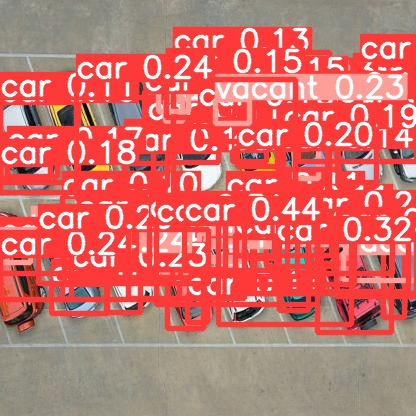

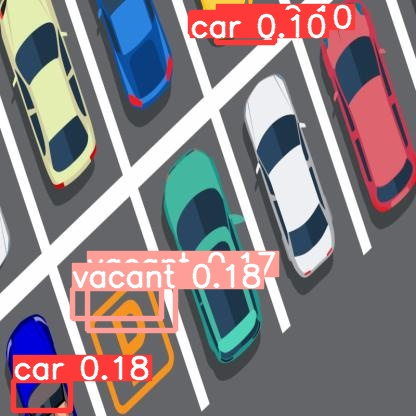

In [7]:
import glob 
from IPython.display import Image, display
i=0
for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'):
  i+=1
  if i<8:
    display(Image(filename=imageName))
    print("\n")